# DATA EXPLORATION AND VISUALIZATION

TEAM: Abraham Borg, Sarom Thin, Mehar Rekhi, Cristian Vazquez

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
from matplotlib import rcParams
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# allow output to span multiple output lines in the console
pd.set_option('display.max_columns', 500)

# switch to seaborn default stylistic parameters
# see the useful https://seaborn.pydata.org/tutorial/aesthetics.html

sns.set()
sns.set_context('paper') # 'talk' for slightly larger

# change default plot size
rcParams['figure.figsize'] = 9,7

In [2]:
# code in this cell from: 
# https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to display/hide the code."></form>''')

Get PKL file with chess data from this link, https://github.com/abecsumb/DataScienceProject/blob/main/chess_data.pkl?raw=true

In [2]:
# read pkl file from local folder. The file contains the dataframe.
chess_data = pd.read_pickle('https://github.com/abecsumb/DataScienceProject/blob/main/chess_data.pkl?raw=true', compression = 'zip')

In [3]:
chess_data.head()

,Date,Game Result,W-ELO,B-ELO,Num Moves,W1,B1,W2,B2,W3,B3,W4,B4,W5,B5,W6,B6,W7,B7,W8,B8,W9,B9,W10,B10,W11,B11,W12,B12,W13,B13,W14,B14,W15,B15,W16,B16,W17,B17,W18,B18,W19,B19,W20,B20,W21,B21,W22,B22,W23,B23,W24,B24,W25,B25,W26,B26,W27,B27,W28,B28,W29,B29,W30,B30,W31,B31,W32,B32,W33,B33,W34,B34,W35,B35,W36,B36,W37,B37,W38,B38,W39,B39,W40,B40,W41,B41,W42,B42,W43,B43,W44,B44,W45,B45,W46,B46,W47,B47,W48,B48,W49,B49,W50,B50,W51,B51,W52,B52,W53,B53,W54,B54,W55,B55,W56,B56,W57,B57,W58,B58,W59,B59,W60,B60,W61,B61,W62,B62,W63,B63,W64,B64,W65,B65,W66,B66,W67,B67,W68,B68,W69,B69,W70,B70,W71,B71,W72,B72,W73,B73,W74,B74,W75,B75
Game1,2000,1-0,2851,2191,79,e4,c5,Nf3,Nc6,Bb5,g6,Bxc6,dxc6,d3,Bg7,h3,Nf6,Nc3,O-O,Be3,Qa5,Qd2,Rd8,O-O,Bd7,Bh6,Qc7,Bxg7,Kxg7,Qe3,b6,Nh2,Rf8,f4,Rad8,Rae1,Bc8,f5,e5,Rf2,Qd6,Ref1,h6,b3,Qd4,Qe1,b5,Ne2,Qd6,Ng3,c4,dxc4,bxc4,Qa5,cxb3,axb3,Rd7,Nf3,c5,Qc3,Re7,Ra1,Rfe8,Ra5,Rc7,Qe3,Qb6,Ra4,Bb7,Qc3,Nd7,Ra1,c4,b4,f6,fxg6,Kxg6,Nh4+,Kh7,Qf3,Qe6,Rxa7,Rg8,Nhf5,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
Game2,2000,1/2-1/2,2851,2725,68,e4,c5,Nf3,Nc6,d4,cxd4,Nxd4,Nf6,Nc3,e5,Ndb5,d6,Bg5,a6,Na3,b5,Bxf6,gxf6,Nd5,f5,c3,Bg7,exf5,Bxf5,Nc2,Be6,a4,O-O,axb5,axb5,Rxa8,Qxa8,Nce3,Qb7,g4,Ne7,Bg2,Nxd5,Bxd5,Qe7,h4,Rc8,g5,Rc5,Be4,d5,Nxd5,Bxd5,Bxd5,e4,Ke2,Qe5,Bb3,Qc7,Qg1,b4,g6,hxg6,Qxg6,Kf8,Qg3,Qxg3,fxg3,bxc3,bxc3,Rxc3,Bd5,Rxg3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
Game3,2000,1-0,2851,2658,87,e4,c5,Nf3,d6,d4,cxd4,Nxd4,Nf6,Nc3,a6,Be3,Ng4,Bg5,h6,Bh4,g5,Bg3,Bg7,h3,Nf6,Bc4,Qb6,O-O,O-O,Nde2,Qxb2,Bb3,Qa3,f4,Nc6,Kh1,Be6,Qd3,Rac8,fxg5,hxg5,Nd5,Rfe8,Rad1,Nb4,Qf3,Nbxd5,exd5,Bd7,c3,a5,Qd3,a4,Bc2,Qc5,Rxf6,exf6,Qh7+,Kf8,Nd4,Re5,Bxe5,fxe5,Ne6+,Bxe6,dxe6,Rc7,Bxa4,d5,Qf5,Qc4,Bd7,Qf4,Qb1,fxe6,Bxe6,Ke7,Bxd5,Rd7,c4,Qe3,Qh7,Kd8,Rb1,Qf4,Be6,Re7,Bg4,Rf7,Qd3+,Qd4,Qg6,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
Game4,2000,1-0,2851,2637,51,e4,e5,Nf3,Nf6,Nxe5,d6,Nf3,Nxe4,d4,d5,Bd3,Be7,O-O,Nc6,c4,Nb4,Be2,O-O,Nc3,Bf5,a3,Nxc3,bxc3,Nc6,Re1,Bf6,Bf4,Ne7,Qb3,b6,cxd5,Nxd5,Be5,Bg4,Rad1,Be7,h3,Bh5,g4,Bg6,Bg3,Nf6,Ne5,Ne4,Bf3,Nxg3,Nc6,Qd6,Nxe7+,Kh8,Bxa8,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
Game5,2000,1-0,2851,2023,45,d4,e6,g3,c5,Nf3,Nc6,Bg2,cxd4,Nxd4,a6,O-O,Qc7,c4,Nf6,Nc3,Nxd4,Qxd4,Bc5,Qd3,O-O,Bf4,d6,Rad1,Rd8,a3,Nh5,Bg5,f6,Bc1,f5,b4,Ba7,Bg5,Nf6,e4,fxe4,Nxe4,Nxe4,Bxe4,Rd7,Bxh7+,Kh8,Bg6,Qc6,Qe2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,

In [4]:
chess_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158252 entries, Game1 to Game158252
Columns: 155 entries, Date to B75
dtypes: int32(4), string(151)
memory usage: 185.9+ MB


In [5]:
chess_data.shape

(158252, 155)

we make a few more dataframes that are views into chess_data. This will make it a little easier to do analysis. 

In [7]:
# consider the opening as the first 8 moves (each side).
openings_white = chess_data.loc[:, 'W1': 'W8': 2] 
openings_black = chess_data.loc[:, 'B1': 'B8': 2] 

In [8]:
# sanity check
openings_white.head()

,W1,W2,W3,W4,W5,W6,W7,W8
Game1,e4,Nf3,Bb5,Bxc6,d3,h3,Nc3,Be3
Game2,e4,Nf3,d4,Nxd4,Nc3,Ndb5,Bg5,Na3
Game3,e4,Nf3,d4,Nxd4,Nc3,Be3,Bg5,Bh4
Game4,e4,Nf3,Nxe5,Nf3,d4,Bd3,O-O,c4
Game5,d4,g3,Nf3,Bg2,Nxd4,O-O,c4,Nc3


In [9]:
openings_black.head()

,B1,B2,B3,B4,B5,B6,B7,B8
Game1,c5,Nc6,g6,dxc6,Bg7,Nf6,O-O,Qa5
Game2,c5,Nc6,cxd4,Nf6,e5,d6,a6,b5
Game3,c5,d6,cxd4,Nf6,a6,Ng4,h6,g5
Game4,e5,Nf6,d6,Nxe4,d5,Be7,Nc6,Nb4
Game5,e6,c5,Nc6,cxd4,a6,Qc7,Nf6,Nxd4


Let's explore how many games were played in each year. We see that we can probably remove games that were played 1970 and earlier since there are so few of them. 

In [10]:
chess_data[['Date']].value_counts()

Date
2004    14126
2005    13352
2003    12846
2002    11565
2006    10624
2001    10187
2000     9745
1999     8614
1998     7968
1997     6977
1996     6671
1995     5765
1994     5093
1993     4294
1992     3781
2007     3443
1991     3124
1990     2657
1989     2328
1988     2077
1987     1477
1986     1166
1984     1089
1985     1055
1982      989
1981      956
1983      928
1978      843
1980      795
1979      739
1977      605
1976      535
1975      477
1972      416
1973      340
1974      334
1971      189
1970       31
1968       12
1964        9
1906        8
1966        8
1958        4
1905        4
1956        2
1954        2
1952        2
dtype: int64

In our current dataset we observe that White has slightly more wins than Black. White is expected to win more than Black on average because it is generally accepted that White has an advantage. We also observe that there are a lot of drawn games. This also makes sense because at the top levels draws happen often. 

In [11]:
chess_data[['Game Result']].value_counts()

Game Result
1-0            58580
1/2-1/2        53807
0-1            45864
*                  1
dtype: int64

Digging deeper we observe that there are mostly games in which White had a higher ELO rating than Black. This fact indicates that there could be a strong correlation between the ELO rating of a player and how often they beat the player with a weaker ELO rating. 

In [12]:
chess_data[chess_data['W-ELO'] > chess_data['B-ELO']]

,Date,Game Result,W-ELO,B-ELO,Num Moves,W1,B1,W2,B2,W3,B3,W4,B4,W5,B5,W6,B6,W7,B7,W8,B8,W9,B9,W10,B10,W11,B11,W12,B12,W13,B13,W14,B14,W15,B15,W16,B16,W17,B17,W18,B18,W19,B19,W20,B20,W21,B21,W22,B22,W23,B23,W24,B24,W25,B25,W26,B26,W27,B27,W28,B28,W29,B29,W30,B30,W31,B31,W32,B32,W33,B33,W34,B34,W35,B35,W36,B36,W37,B37,W38,B38,W39,B39,W40,B40,W41,B41,W42,B42,W43,B43,W44,B44,W45,B45,W46,B46,W47,B47,W48,B48,W49,B49,W50,B50,W51,B51,W52,B52,W53,B53,W54,B54,W55,B55,W56,B56,W57,B57,W58,B58,W59,B59,W60,B60,W61,B61,W62,B62,W63,B63,W64,B64,W65,B65,W66,B66,W67,B67,W68,B68,W69,B69,W70,B70,W71,B71,W72,B72,W73,B73,W74,B74,W75,B75
Game1,2000,1-0,2851,2191,79,e4,c5,Nf3,Nc6,Bb5,g6,Bxc6,dxc6,d3,Bg7,h3,Nf6,Nc3,O-O,Be3,Qa5,Qd2,Rd8,O-O,Bd7,Bh6,Qc7,Bxg7,Kxg7,Qe3,b6,Nh2,Rf8,f4,Rad8,Rae1,Bc8,f5,e5,Rf2,Qd6,Ref1,h6,b3,Qd4,Qe1,b5,Ne2,Qd6,Ng3,c4,dxc4,bxc4,Qa5,cxb3,axb3,Rd7,Nf3,c5,Qc3,Re7,Ra1,Rfe8,Ra5,Rc7,Qe3,Qb6,Ra4,Bb7,Qc3,Nd7,Ra1,c4,b4,f6,fxg6,Kxg6,Nh4+,Kh7,Qf3,Qe6,Rxa7,Rg8,Nhf5,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
Game2,2000,1/2-1/2,2851,2725,68,e4,c5,Nf3,Nc6,d4,cxd4,Nxd4,Nf6,Nc3,e5,Ndb5,d6,Bg5,a6,Na3,b5,Bxf6,gxf6,Nd5,f5,c3,Bg7,exf5,Bxf5,Nc2,Be6,a4,O-O,axb5,axb5,Rxa8,Qxa8,Nce3,Qb7,g4,Ne7,Bg2,Nxd5,Bxd5,Qe7,h4,Rc8,g5,Rc5,Be4,d5,Nxd5,Bxd5,Bxd5,e4,Ke2,Qe5,Bb3,Qc7,Qg1,b4,g6,hxg6,Qxg6,Kf8,Qg3,Qxg3,fxg3,bxc3,bxc3,Rxc3,Bd5,Rxg3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
Game3,2000,1-0,2851,2658,87,e4,c5,Nf3,d6,d4,cxd4,Nxd4,Nf6,Nc3,a6,Be3,Ng4,Bg5,h6,Bh4,g5,Bg3,Bg7,h3,Nf6,Bc4,Qb6,O-O,O-O,Nde2,Qxb2,Bb3,Qa3,f4,Nc6,Kh1,Be6,Qd3,Rac8,fxg5,hxg5,Nd5,Rfe8,Rad1,Nb4,Qf3,Nbxd5,exd5,Bd7,c3,a5,Qd3,a4,Bc2,Qc5,Rxf6,exf6,Qh7+,Kf8,Nd4,Re5,Bxe5,fxe5,Ne6+,Bxe6,dxe6,Rc7,Bxa4,d5,Qf5,Qc4,Bd7,Qf4,Qb1,fxe6,Bxe6,Ke7,Bxd5,Rd7,c4,Qe3,Qh7,Kd8,Rb1,Qf4,Be6,Re7,Bg4,Rf7,Qd3+,Qd4,Qg6,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
Game4,2000,1-0,2851,2637,51,e4,e5,Nf3,Nf6,Nxe5,d6,Nf3,Nxe4,d4,d5,Bd3,Be7,O-O,Nc6,c4,Nb4,Be2,O-O,Nc3,Bf5,a3,Nxc3,bxc3,Nc6,Re1,Bf6,Bf4,Ne7,Qb3,b6,cxd5,Nxd5,Be5,Bg4,Rad1,Be7,h3,Bh5,g4,Bg6,Bg3,Nf6,Ne5,Ne4,Bf3,Nxg3,Nc6,Qd6,Nxe7+,Kh8,Bxa8,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
Game5,2000,1-0,2851,2023,45,d4,e6,g3,c5,Nf3,Nc6,Bg2,cxd4,Nxd4,a6,O-O,Qc7,c4,Nf6,Nc3,Nxd4,Qxd4,Bc5,Qd3,O-O,Bf4,d6,Rad1,Rd8,a3,Nh5,Bg5,f6,Bc1,f5,b4,Ba7,Bg5,Nf6,e4,fxe4,Nxe4,Nxe4,Bxe4,Rd7,Bxh7+,Kh8,Bg6,Qc6,Qe2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,

In [13]:
chess_data[chess_data['W-ELO'] > chess_data['B-ELO']].shape

(78994, 155)

In [14]:
chess_data[chess_data['B-ELO'] > chess_data['W-ELO']].shape

(77400, 155)

Further analysis reveals that the Black ELO in this dataset is centered around 2600, whereas White ELO tends to be over 2650. One explanation for this fact is that White may have an inherent advantage over Black since White moves first. Indeed, there is outside data to support this assertion. Chess.com compiles and analyzes their own database of chess games. White consistently wins more often than Black in their dataset.

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'W-ELO'}>],
       [<AxesSubplot:title={'center':'B-ELO'}>,
        <AxesSubplot:title={'center':'Num Moves'}>]], dtype=object)

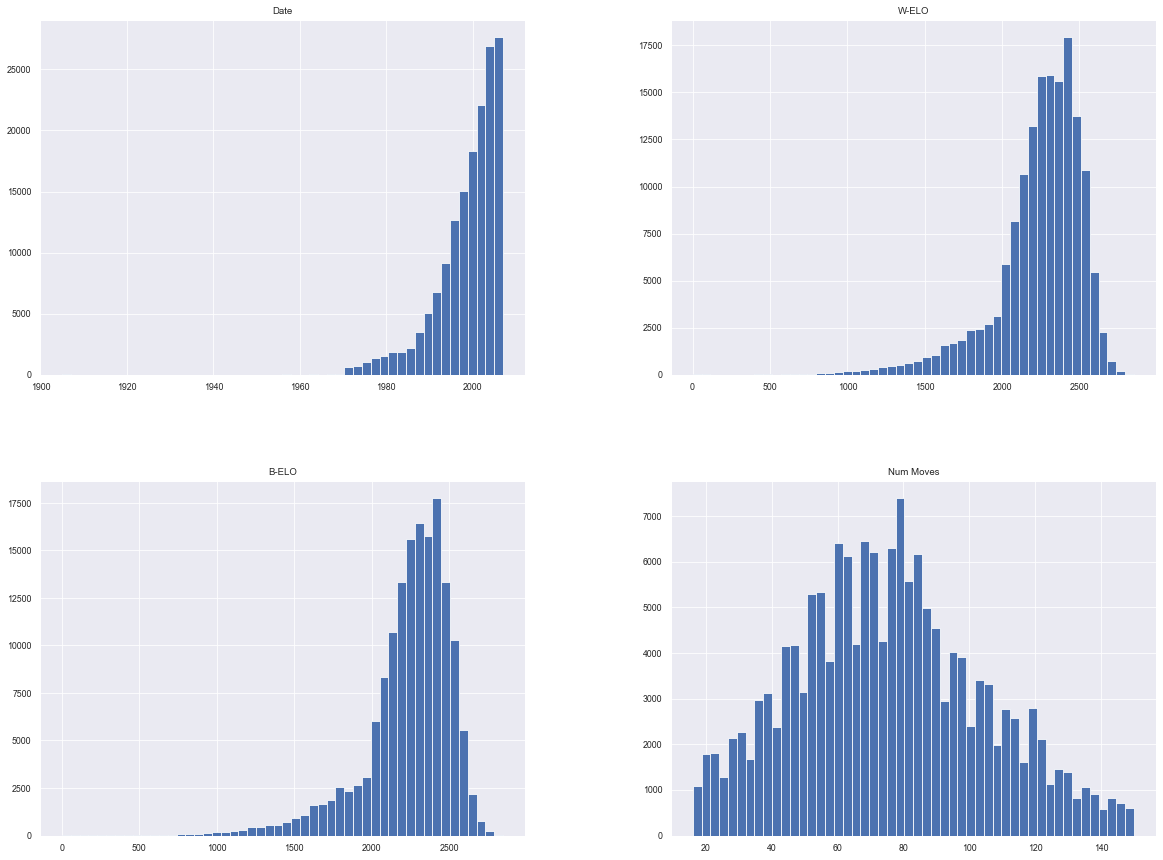

In [15]:
chess_data.hist(bins = 50, figsize = (20, 15))

array([[<AxesSubplot:xlabel='Date', ylabel='Date'>,
        <AxesSubplot:xlabel='W-ELO', ylabel='Date'>,
        <AxesSubplot:xlabel='B-ELO', ylabel='Date'>,
        <AxesSubplot:xlabel='Num Moves', ylabel='Date'>],
       [<AxesSubplot:xlabel='Date', ylabel='W-ELO'>,
        <AxesSubplot:xlabel='W-ELO', ylabel='W-ELO'>,
        <AxesSubplot:xlabel='B-ELO', ylabel='W-ELO'>,
        <AxesSubplot:xlabel='Num Moves', ylabel='W-ELO'>],
       [<AxesSubplot:xlabel='Date', ylabel='B-ELO'>,
        <AxesSubplot:xlabel='W-ELO', ylabel='B-ELO'>,
        <AxesSubplot:xlabel='B-ELO', ylabel='B-ELO'>,
        <AxesSubplot:xlabel='Num Moves', ylabel='B-ELO'>],
       [<AxesSubplot:xlabel='Date', ylabel='Num Moves'>,
        <AxesSubplot:xlabel='W-ELO', ylabel='Num Moves'>,
        <AxesSubplot:xlabel='B-ELO', ylabel='Num Moves'>,
        <AxesSubplot:xlabel='Num Moves', ylabel='Num Moves'>]],
      dtype=object)

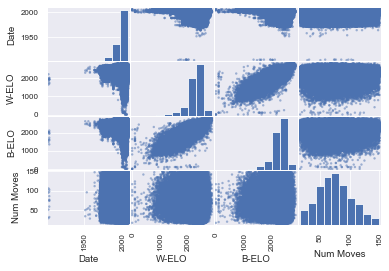

In [15]:
pd.plotting.scatter_matrix(chess_data)

<AxesSubplot:xlabel='Num Moves', ylabel='Count'>

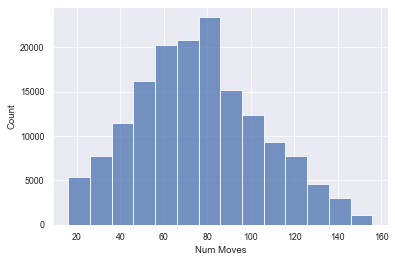

In [16]:
# creating a histogram to see what are the common number of moves for a game.
sns.histplot(data=chess_data,x=chess_data['Num Moves'],binwidth=10)